<a href="https://colab.research.google.com/github/SantiagoRidao/Proyectos_Data/blob/main/Analisis_precio_del_dolar_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

url = 'https://drive.google.com/uc?id=1xEoQV1yaTWp_NQEg9br-IfMY6K7UdUIY'
datos_dolar = pd.read_csv(url, index_col=0)

datos_dolar.head()



,Hace 3 dias,Hace 4 dias,Hace 6 dias,Hace 8 dias,Hace 9 dias,Hace 11 dias,Hace 12 dias,Hace 14 dias,Hace 16 dias,Hace 17 dias,...,Hace 24 dias,Hace 25 dias,Hace 27 dias,Hace 28 dias,Hace 30 dias,Hace 32 dias,Hace 33 dias,Hace 35 dias,Hace 36 dias,y
0,3.190667,3.190444,3.191067,3.184000,3.179250,3.171133,3.168242,3.166513,3.168000,3.170083,...,3.194000,3.192417,3.191026,3.191852,3.196644,3.203613,3.207208,3.214314,3.217543,3.193333
1,3.188000,3.188889,3.189467,3.188000,3.184167,3.176133,3.172424,3.168256,3.168222,3.169083,...,3.194319,3.193639,3.191000,3.190815,3.193494,3.199634,3.203042,3.210137,3.213486,3.199333
2,3.189333,3.189778,3.190000,3.190571,3.188667,3.181267,3.177697,3.171487,3.169556,3.169792,...,3.193130,3.194278,3.192179,3.191086,3.191678,3.196172,3.199438,3.206157,3.209657,3.200667
3,3.196333,3.192667,3.191867,3.191429,3.191667,3.186600,3.182909,3.176103,3.172000,3.171417,...,3.190232,3.193389,3.193846,3.192444,3.191195,3.193677,3.196271,3.202647,3.205962,3.199333
4,3.200000,3.197778,3.193867,3.192857,3.192583,3.190933,3.187879,3.181128,3.175289,3.173792,...,3.186435,3.190667,3.194718,3.194099,3.191701,3.192215,3.193896,3.199471,3.202590,3.193333


In [ ]:
#Vamos a guardar datos obtenidos del test
maeModel1 = []
mapeModel1 = []
mseModel2 = []
mapeModel2 = []
maeModel3 = []
mapeModel3 = []
maeModel4 = []
mapeModel4 = []
maeModel5 = []
mapeModel5 = []

# Modelo 1

In [ ]:
#Obtener los datos
first_test = int(len(datos_dolar)*0.8)
test = datos_dolar.iloc[first_test:]
y_test = test['y']
X_test = test.drop(columns=['y'])

X = datos_dolar.iloc[:first_test]
y = X['y']
X = X.drop(columns=['y'])

first_val = int(len(X)*0.9)
X_train = X.iloc[:first_val]
y_train = y.iloc[:first_val]
X_val = X.iloc[first_val:]

y_val = y.iloc[first_val:]



In [ ]:
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Dense(500, activation = 'relu'))
model_1.add(tf.keras.layers.Dropout(0.2))
model_1.add(tf.keras.layers.Dense(10, activation='relu'))

model_1.add(tf.keras.layers.Dense(1))

In [ ]:
model_1.compile(loss='mae', optimizer='adam', metrics=['mean_absolute_percentage_error'] )


In [ ]:
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 200, batch_size=432, shuffle=False)

Epoch 1/200
9/9 [==============================] - 1s 32ms/step - loss: 1.6550 - mean_absolute_percentage_error: 38.5506 - val_loss: 2.2023 - val_mean_absolute_percentage_error: 7.8169
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 1.7301 - mean_absolute_percentage_error: 28.4358 - val_loss: 3.4651 - val_mean_absolute_percentage_error: 12.4168
Epoch 3/200
9/9 [==============================] - 0s 10ms/step - loss: 1.5014 - mean_absolute_percentage_error: 23.0592 - val_loss: 3.9960 - val_mean_absolute_percentage_error: 14.7959
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 1.1315 - mean_absolute_percentage_error: 17.0961 - val_loss: 4.6670 - val_mean_absolute_percentage_error: 16.8057
Epoch 5/200
9/9 [==============================] - 0s 11ms/step - loss: 0.7180 - mean_absolute_percentage_error: 11.5424 - val_loss: 1.2329 - val_mean_absolute_percentage_error: 4.4984
Epoch 6/200
9/9 [==============================] - 0s 10ms/step - loss: 

In [ ]:
test_loss, test_m = model_1.evaluate(X_test, y_test)

maeModel1.append(test_loss)
mapeModel1.append(test_m)
print(maeModel1)
mapeModel1

32/32 [==============================] - 0s 1ms/step - loss: 3.8182 - mean_absolute_percentage_error: 3.7065
[1.054955244064331, 0.9285672307014465, 1.035744071006775, 2.6900908946990967, 1.0697070360183716, 3.3249826431274414, 2.8045129776000977, 3.357065439224243, 3.703382968902588, 3.81823992729187]


[1.0430060625076294,
 1.1681143045425415,
 1.2623640298843384,
 2.625145196914673,
 1.3147965669631958,
 3.2279865741729736,
 2.727113962173462,
 3.253722906112671,
 3.632097005844116,
 3.706477642059326]

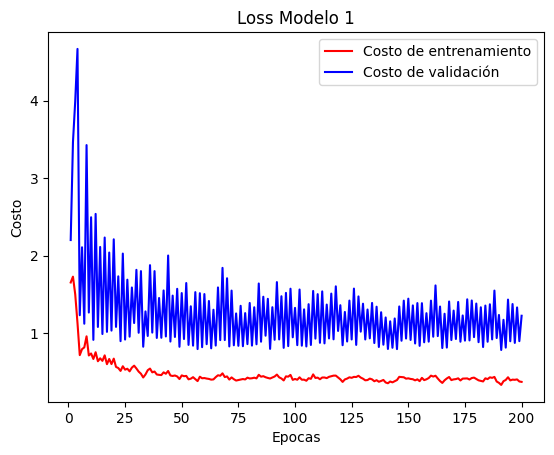

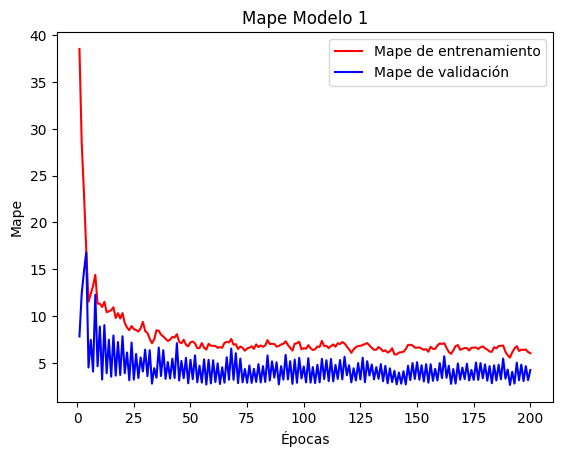

In [ ]:

loss = history.history['loss']
mape = history.history['mean_absolute_percentage_error']

epocas = range(1, len(mape) + 1)

plt.plot(epocas,loss, 'r', label='Costo de entrenamiento')
plt.plot(epocas, history.history['val_loss'], 'b', label='Costo de validación')
plt.title('Loss Modelo 1')
plt.xlabel('Epocas')
plt.ylabel('Costo')
plt.legend(loc='best')

plt.show()

plt.plot(epocas, mape, 'r', label='Mape de entrenamiento')
plt.plot(epocas, history.history['val_mean_absolute_percentage_error'], 'b', label ='Mape de validación')
plt.title('Mape Modelo 1')
plt.xlabel('Épocas')
plt.ylabel('Mape')
plt.legend(loc='best')

plt.show()



In [ ]:
X_predict = X_test.iloc[-1].values.reshape(1, -1)
pruebaPrediccion = model_1.predict(X_predict)
print(f'Dolar de la última fecha predicho: {pruebaPrediccion}')

1/1 [==============================] - 0s 97ms/step
Dolar de la última fecha predicho: [[206.87651]]


In [ ]:
predicciones1 = []

for i in range(len(X_test)):
   prediccion = model_1.predict(X_test.iloc[i].values.reshape(1, -1), verbose=0)
   predicciones1.append(prediccion[0][0])
#Guardando las predicciones en un DataFrame
df_prediccion1 = pd.DataFrame()
df_prediccion1['Predicción'] = predicciones1

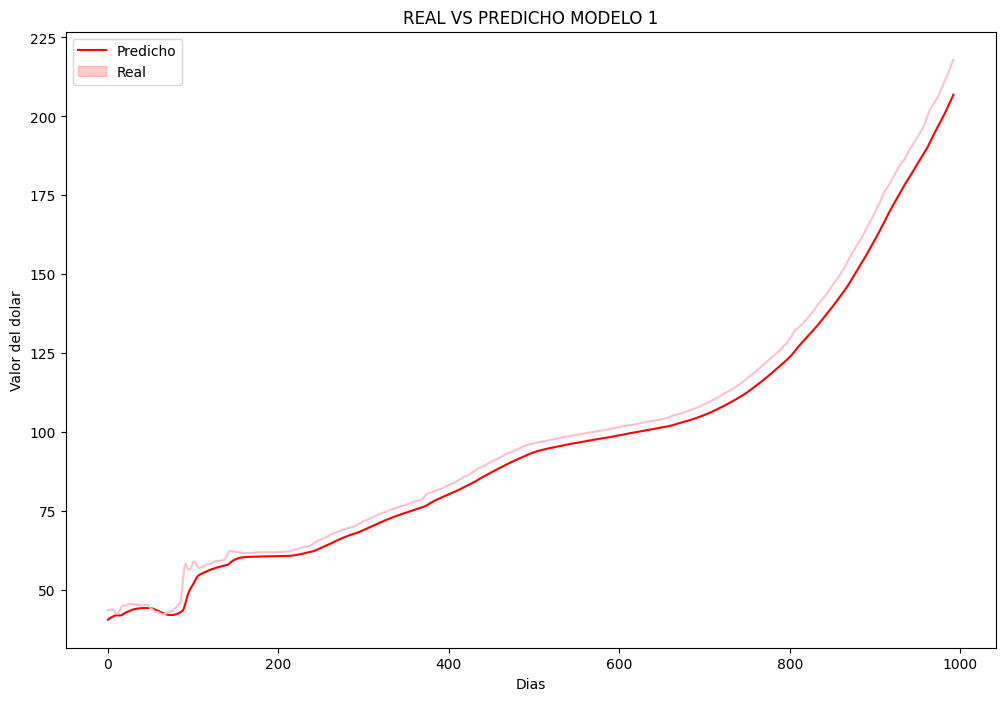

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=[i for i in range(0,len(X_test))], y= df_prediccion1.iloc[:, 0], color = 'red' )


sns.lineplot(x=[i for i in range(len(X_test))],y=y_test, color = 'pink')


plt.title("REAL VS PREDICHO MODELO 1")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Predicho", "Real"])
plt.show()

# Modelo 2

En este modelo se utilizaron los 16 días anteriores.

In [ ]:
dolar_dias_reducido = datos_dolar.iloc[:, :9]
dolar_dias_reducido

,Hace 3 dias,Hace 4 dias,Hace 6 dias,Hace 8 dias,Hace 9 dias,Hace 11 dias,Hace 12 dias,Hace 14 dias,Hace 16 dias
0,3.190667,3.190444,3.191067,3.184000,3.179250,3.171133,3.168242,3.166513,3.168000
1,3.188000,3.188889,3.189467,3.188000,3.184167,3.176133,3.172424,3.168256,3.168222
2,3.189333,3.189778,3.190000,3.190571,3.188667,3.181267,3.177697,3.171487,3.169556
3,3.196333,3.192667,3.191867,3.191429,3.191667,3.186600,3.182909,3.176103,3.172000
4,3.200000,3.197778,3.193867,3.192857,3.192583,3.190933,3.187879,3.181128,3.175289
...,...,...,...,...,...,...,...,...,...
4956,213.505333,213.207111,212.599600,211.967048,211.634083,210.984600,210.664424,210.046462,209.451600
4957,214.134000,213.825111,213.216267,212.598857,212.279250,211.625133,211.300970,210.669846,210.059378
4958,214.752333,214.436000,213.825200,213.214667,212.904000,212.257733,211.935576,211.293333,210.673911
4959,215.502667,215.156667,214.496133,213.869524,213.558500,212.923933,212.594788,211.947385,211.314222


In [ ]:
first_test = int(len(dolar_dias_reducido)*0.8)
X_test = dolar_dias_reducido.iloc[first_test:]
y_test = datos_dolar['y'].iloc[first_test:]

X = dolar_dias_reducido.iloc[:first_test]
y = datos_dolar['y'].iloc[:first_test]

first_val = int(len(X)*0.9)
X_train = X.iloc[:first_val]
y_train = y.iloc[:first_val]

X_val = X.iloc[first_val:]

y_val = y.iloc[first_val:]

In [ ]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Dense(629, activation = 'relu'))
model2.add(tf.keras.layers.Dense(323, activation='LeakyReLU'))

model2.add(tf.keras.layers.Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'] )

#Entrenamiento
history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 120, batch_size=320, shuffle=True)

#Evaluación
print('\n')
test_loss, test_m = model2.evaluate(X_test, y_test)
mseModel2.append(test_loss)
mapeModel2.append(test_m)

print(mseModel2)
mapeModel2


Epoch 1/120
12/12 [==============================] - 1s 29ms/step - loss: 8.4974 - mean_absolute_percentage_error: 36.1705 - val_loss: 37.6276 - val_mean_absolute_percentage_error: 21.0062
Epoch 2/120
12/12 [==============================] - 0s 15ms/step - loss: 0.9984 - mean_absolute_percentage_error: 12.8051 - val_loss: 13.7741 - val_mean_absolute_percentage_error: 12.4714
Epoch 3/120
12/12 [==============================] - 0s 15ms/step - loss: 0.4736 - mean_absolute_percentage_error: 8.8922 - val_loss: 3.7196 - val_mean_absolute_percentage_error: 6.3331
Epoch 4/120
12/12 [==============================] - 0s 16ms/step - loss: 0.1062 - mean_absolute_percentage_error: 3.9762 - val_loss: 1.0554 - val_mean_absolute_percentage_error: 2.9447
Epoch 5/120
12/12 [==============================] - 0s 17ms/step - loss: 0.0597 - mean_absolute_percentage_error: 2.9913 - val_loss: 1.4240 - val_mean_absolute_percentage_error: 2.9708
Epoch 6/120
12/12 [==============================] - 0s 17ms/ste

[0.3985351026058197,
 0.41097307205200195,
 0.4093492925167084,
 0.5755318403244019,
 1.571844220161438,
 0.5506868958473206,
 0.38942235708236694,
 1.4271714687347412,
 0.7395755648612976,
 0.3925071656703949]

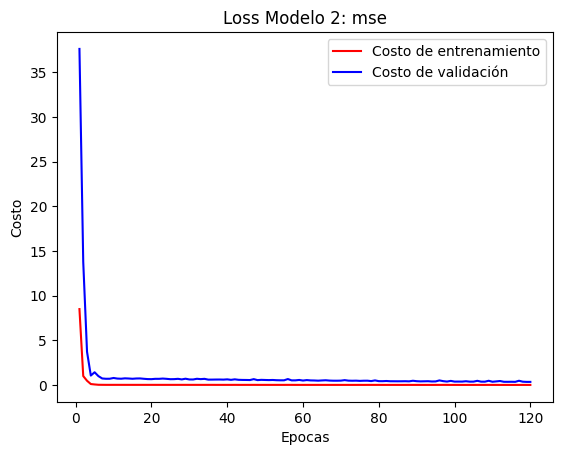

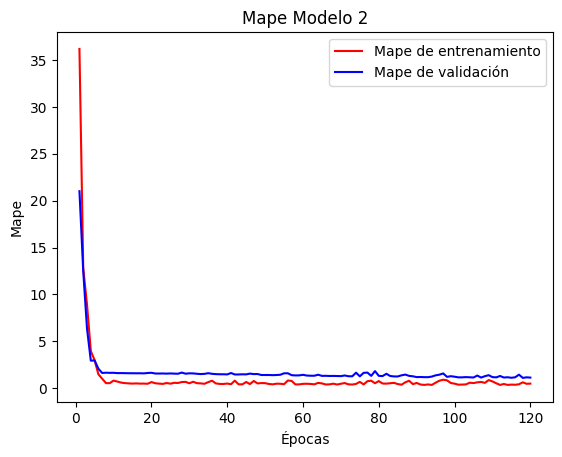

In [ ]:

loss = history.history['loss']
mape = history.history['mean_absolute_percentage_error']

epocas = range(1, len(mape) + 1)

plt.plot(epocas,loss, 'r', label='Costo de entrenamiento')
plt.plot(epocas, history.history['val_loss'], 'b', label='Costo de validación')
plt.title('Loss Modelo 2: mse')
plt.xlabel('Epocas')
plt.ylabel('Costo')
plt.legend(loc='best')

plt.show()

plt.plot(epocas, mape, 'r', label='Mape de entrenamiento')
plt.plot(epocas, history.history['val_mean_absolute_percentage_error'], 'b', label ='Mape de validación')
plt.title('Mape Modelo 2')
plt.xlabel('Épocas')
plt.ylabel('Mape')
plt.legend(loc='best')

plt.show()



In [ ]:
X_predict2 = X_test.iloc[-1].values.reshape(1, -1)
pruebaPrediccion2 = model2.predict(X_predict2)
print(f'Dolar de último día predicho: {pruebaPrediccion2}')

1/1 [==============================] - 0s 64ms/step
Dolar de último día predicho: [[217.36519]]


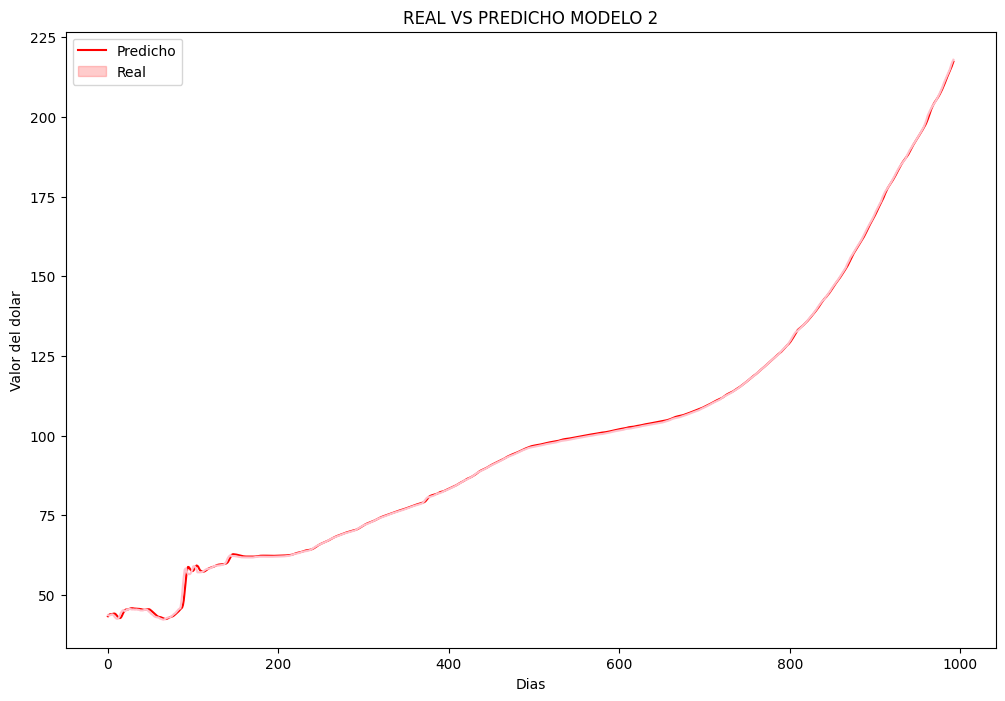

In [ ]:
predicciones2 = []

for i in range(len(X_test)):

   prediccion = model2.predict(X_test.iloc[i].values.reshape(1, -1), verbose=0)

   predicciones2.append(prediccion[0][0])

#Guardando las predicciones en un DataFrame
df_prediccion2 = pd.DataFrame()
df_prediccion2['Predicción'] = predicciones2


plt.figure(figsize=(12, 8))
sns.lineplot(x=[i for i in range(0,len(X_test))], y= df_prediccion2.iloc[:, 0], color = 'red' )


sns.lineplot(x=[i for i in range(len(X_test))],y=y_test, color = 'pink')


plt.title("REAL VS PREDICHO MODELO 2")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Predicho", "Real"])
plt.show()

# Modelo 3

Modelo utilizando una cantidad de datos reducida a 9 días.

In [ ]:
dolar_dias_9 = datos_dolar.iloc[:, :5]
dolar_dias_9

,Hace 3 dias,Hace 4 dias,Hace 6 dias,Hace 8 dias,Hace 9 dias
0,3.190667,3.190444,3.191067,3.184000,3.179250
1,3.188000,3.188889,3.189467,3.188000,3.184167
2,3.189333,3.189778,3.190000,3.190571,3.188667
3,3.196333,3.192667,3.191867,3.191429,3.191667
4,3.200000,3.197778,3.193867,3.192857,3.192583
...,...,...,...,...,...
4956,213.505333,213.207111,212.599600,211.967048,211.634083
4957,214.134000,213.825111,213.216267,212.598857,212.279250
4958,214.752333,214.436000,213.825200,213.214667,212.904000
4959,215.502667,215.156667,214.496133,213.869524,213.558500


In [ ]:
first_test = int(len(dolar_dias_9)*0.8)
X_test = dolar_dias_9.iloc[first_test:]
y_test = datos_dolar['y'].iloc[first_test:]

X = dolar_dias_9.iloc[:first_test]
y = datos_dolar['y'].iloc[:first_test]

first_val = int(len(X)*0.9)
X_train = X.iloc[:first_val]
y_train = y.iloc[:first_val]

X_val = X.iloc[first_val:]

y_val = y.iloc[first_val:]

In [ ]:
model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.Dense(695, activation = 'relu'))
model3.add(tf.keras.layers.Dropout(0.1))
model3.add(tf.keras.layers.Dense(222, activation='relu'))

model3.add(tf.keras.layers.Dense(1))

model3.compile(loss='mae', optimizer='adam', metrics=['mean_absolute_percentage_error'] )

#Entrenamiento
history = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 130, batch_size=100, shuffle=True)

print('\n')
#Evaluación
test_loss, test_m = model3.evaluate(X_test, y_test)
maeModel3.append(test_loss)
mapeModel3.append(test_m)
print(maeModel3)
mapeModel3

Epoch 1/130
36/36 [==============================] - 1s 12ms/step - loss: 0.8684 - mean_absolute_percentage_error: 15.0182 - val_loss: 0.8823 - val_mean_absolute_percentage_error: 3.2227
Epoch 2/130
36/36 [==============================] - 0s 8ms/step - loss: 0.1717 - mean_absolute_percentage_error: 2.9898 - val_loss: 0.4302 - val_mean_absolute_percentage_error: 1.4555
Epoch 3/130
36/36 [==============================] - 0s 8ms/step - loss: 0.1529 - mean_absolute_percentage_error: 2.6641 - val_loss: 0.5640 - val_mean_absolute_percentage_error: 1.9489
Epoch 4/130
36/36 [==============================] - 0s 8ms/step - loss: 0.1356 - mean_absolute_percentage_error: 2.3729 - val_loss: 0.4284 - val_mean_absolute_percentage_error: 1.4128
Epoch 5/130
36/36 [==============================] - 0s 7ms/step - loss: 0.1246 - mean_absolute_percentage_error: 2.1596 - val_loss: 0.4325 - val_mean_absolute_percentage_error: 1.4286
Epoch 6/130
36/36 [==============================] - 0s 8ms/step - loss: 

[1.477022647857666,
 5.179222583770752,
 4.0489702224731445,
 4.398620128631592,
 3.90664005279541,
 2.595085382461548,
 4.240196228027344,
 5.451539516448975,
 4.063904285430908,
 3.4231159687042236]

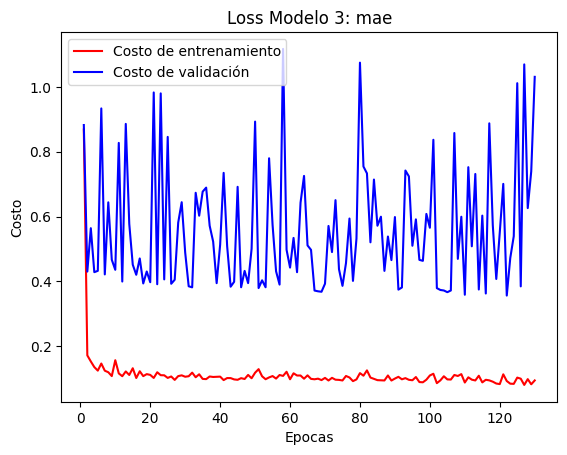

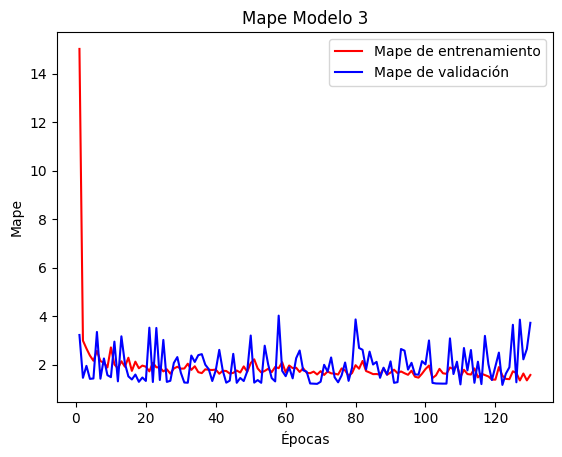

In [ ]:
loss = history.history['loss']
mape = history.history['mean_absolute_percentage_error']

epocas = range(1, len(mape) + 1)

plt.plot(epocas,loss, 'r', label='Costo de entrenamiento')
plt.plot(epocas, history.history['val_loss'], 'b', label='Costo de validación')
plt.title('Loss Modelo 3: mae')
plt.xlabel('Epocas')
plt.ylabel('Costo')
plt.legend(loc='best')

plt.show()

plt.plot(epocas, mape, 'r', label='Mape de entrenamiento')
plt.plot(epocas, history.history['val_mean_absolute_percentage_error'], 'b', label ='Mape de validación')
plt.title('Mape Modelo 3')
plt.xlabel('Épocas')
plt.ylabel('Mape')
plt.legend(loc='best')

plt.show()

In [ ]:
X_predict3 = X_test.iloc[-1].values.reshape(1, -1)
pruebaPrediccion3 = model3.predict(X_predict3)
print(f'Dolar de la última fecha predicho: {pruebaPrediccion3}')

1/1 [==============================] - 0s 62ms/step
Dolar de la última fecha predicho: [[209.59024]]


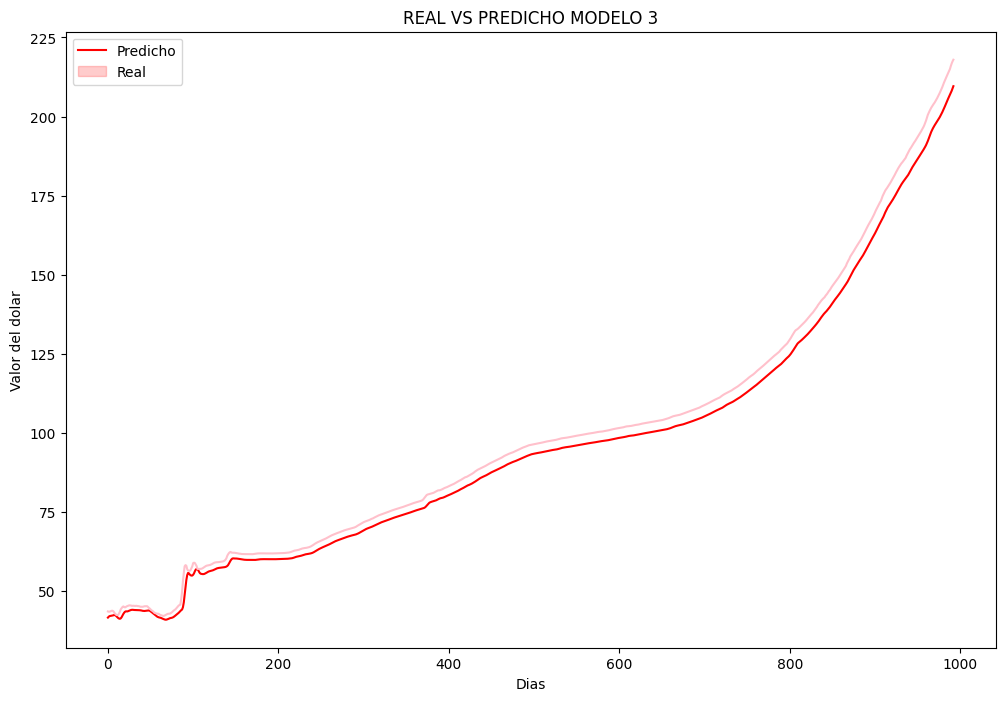

In [ ]:
predicciones3 = []
for i in range(len(X_test)):

   prediccion = model3.predict(X_test.iloc[i].values.reshape(1, -1), verbose=0)
   predicciones3.append(prediccion[0][0])
 #Guardamos les predicciones en un Dataframe
df_prediccion3 = pd.DataFrame()
df_prediccion3['Predicción'] = predicciones3

plt.figure(figsize=(12, 8))
sns.lineplot(x=[i for i in range(0,len(X_test))], y= df_prediccion3.iloc[:, 0], color = 'red' )


sns.lineplot(x=[i for i in range(len(X_test))],y=y_test, color = 'pink')


plt.title("REAL VS PREDICHO MODELO 3")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Predicho", "Real"])
plt.show()

# Modelo 4

Modelo utilizando regresión lineal.

In [ ]:
regressor_model = LinearRegression(fit_intercept=True)

regressor_model.fit(X_train, y_train)

prediccion = regressor_model.predict(X_test)

errorPorcentual = mean_absolute_percentage_error(y_test, prediccion)

print(f'Porcentaje de error: {errorPorcentual}')


Porcentaje de error: 0.0016969948880847304


In [ ]:
predicciones4 = []
for i in range(len(X_test)):

   prediccion = regressor_model.predict(X_test.iloc[i].values.reshape(1, -1))
   predicciones4.append(prediccion[0])
   print( prediccion[0])

df_prediccion4 = pd.DataFrame()
df_prediccion4['Predicción'] = predicciones4
df_prediccion4

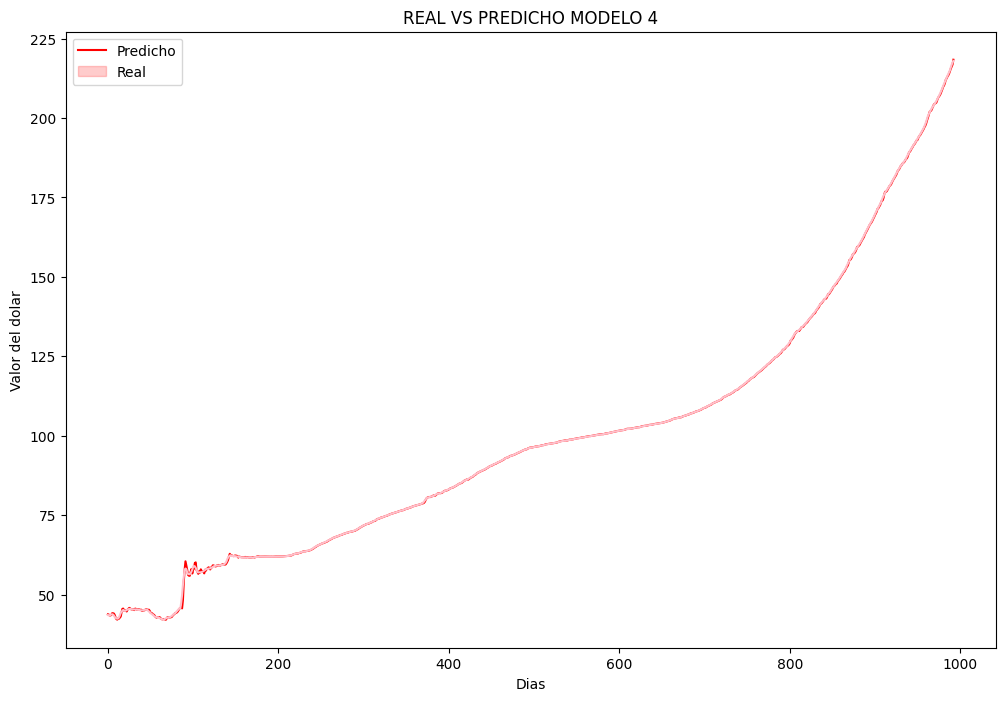

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=[i for i in range(0,len(X_test))], y= df_prediccion4.iloc[:, 0], color = 'red' )


sns.lineplot(x=[i for i in range(len(X_test))],y=y_test, color = 'pink')


plt.title("REAL VS PREDICHO MODELO 4")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Predicho", "Real"])
plt.show()

# Modelo 5

In [ ]:
#Obtener los datos
first_test = int(len(datos_dolar)*0.8)
test = datos_dolar.iloc[first_test:]
y_test = test['y']
X_test = test.drop(columns=['y'])

X = datos_dolar.iloc[:first_test]
y = X['y']
X = X.drop(columns=['y'])

first_val = int(len(X)*0.9)
X_train = X.iloc[:first_val]
y_train = y.iloc[:first_val]
X_val = X.iloc[first_val:]

y_val = y.iloc[first_val:]



In [ ]:
model5 = tf.keras.models.Sequential()

model5.add(tf.keras.layers.Dense(600, activation = 'LeakyReLU'))
model5.add(tf.keras.layers.Dropout(0.3))
model5.add(tf.keras.layers.Dense(10, activation='LeakyReLU'))

model5.add(tf.keras.layers.Dense(1))

model5.compile(loss='mae', optimizer='adam', metrics=['mean_absolute_percentage_error'] )

#Entrenamiento
history = model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 3000, batch_size=120, shuffle=False)

print('\nEvaluación')
#Evaluación
test_loss, test_m = model5.evaluate(X_test, y_test)
maeModel5.append(test_loss)
mapeModel5.append(test_m)
print(maeModel5)
mapeModel5

Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 503/3000
30/30 [==============================] - 0s 6ms/step - loss: 0.1023 - mean_absolute_percentage_error: 1.6209 - val_loss: 0.4281 - val_mean_absolute_percentage_error: 1.4788
Epoch 504/3000
30/30 [==============================] - 0s 6ms/step - loss: 0.1094 - mean_absolute_percentage_error: 1.8182 - val_loss: 0.4141 - val_mean_absolute_percentage_error: 1.4108
Epoch 505/3000
30/30 [==============================] - 0s 6ms/step - loss: 0.1034 - mean_absolute_percentage_error: 1.6666 - val_loss: 0.3418 - val_mean_absolute_percentage_error: 1.1140
Epoch 506/3000
30/30 [==============================] - 0s 6ms/step - loss: 0.1160 - mean_absolute_percentage_error: 1.9279 - val_loss: 0.3511 - val_mean_absolute_percentage_error: 1.1483
Epoch 507/3000
30/30 [==============================] - 0s 7ms/step - loss: 0.1259 - mean_absolute_percentage_error: 2.0878 - val_loss: 0.6615 - val_mean_absolute_percentage_error: 2.4018

[1.9228240251541138, 1.4917227029800415]

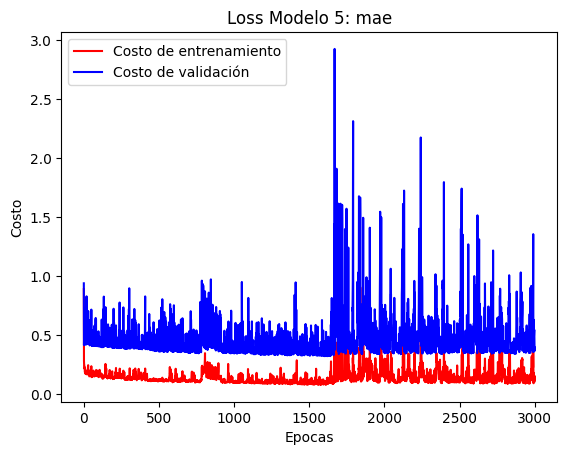

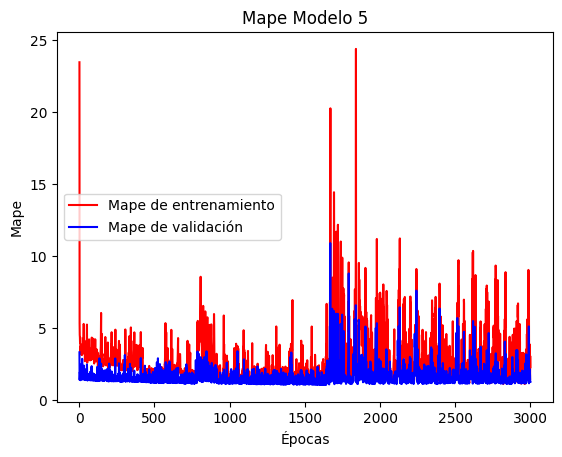

In [ ]:
loss = history.history['loss']
mape = history.history['mean_absolute_percentage_error']

epocas = range(1, len(mape) + 1)

plt.plot(epocas,loss, 'r', label='Costo de entrenamiento')
plt.plot(epocas, history.history['val_loss'], 'b', label='Costo de validación')
plt.title('Loss Modelo 5: mae')
plt.xlabel('Epocas')
plt.ylabel('Costo')
plt.legend(loc='best')

plt.show()

plt.plot(epocas, mape, 'r', label='Mape de entrenamiento')
plt.plot(epocas, history.history['val_mean_absolute_percentage_error'], 'b', label ='Mape de validación')
plt.title('Mape Modelo 5')
plt.xlabel('Épocas')
plt.ylabel('Mape')
plt.legend(loc='best')

plt.show()


In [ ]:
X_predict5 = X_test.iloc[-1].values.reshape(1, -1)
pruebaPrediccion5 = model5.predict(X_predict5)
print(f'Dolar de la última fecha predicho: {pruebaPrediccion5}')

1/1 [==============================] - 0s 57ms/step
Dolar de la última fecha predicho: [[221.73615]]


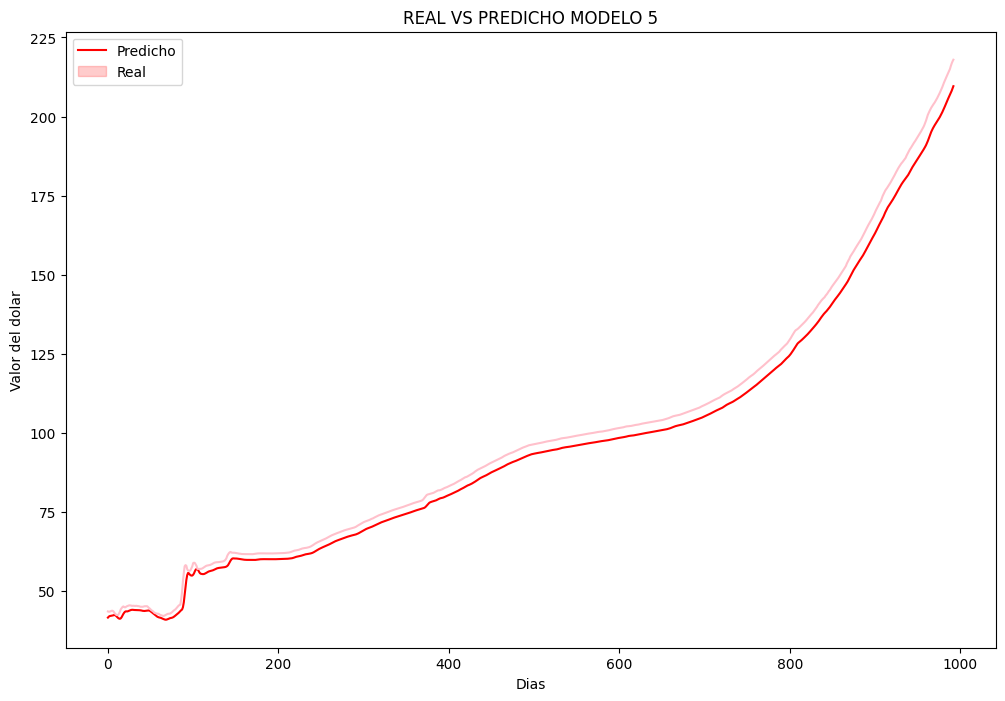

In [ ]:
predicciones5 = []
for i in range(len(X_test)):

   prediccion = model5.predict(X_test.iloc[i].values.reshape(1, -1), verbose=0)
   predicciones5.append(prediccion[0][0])
 #Guardamos les predicciones en un Dataframe
df_prediccion5 = pd.DataFrame()
df_prediccion5['Predicción'] = predicciones3

plt.figure(figsize=(12, 8))
sns.lineplot(x=[i for i in range(0,len(X_test))], y= df_prediccion3.iloc[:, 0], color = 'red' )


sns.lineplot(x=[i for i in range(len(X_test))],y=y_test, color = 'pink')


plt.title("REAL VS PREDICHO MODELO 5")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Predicho", "Real"])
plt.show()

## Obtener resultados



In [ ]:
def obtenerResultados(modelMae, modelMape):
    mejorResult = 10
    mejorMape = 10
    sumaMae = 0
    sumaMape = 0
    promedioMae = 0
    promedioMape = 0
    for mae in modelMae:
      sumaMae += mae
      if mae < mejorResult:
         mejorResult = mae
    for mape in modelMape:
        sumaMape += mape
        if mape < mejorMape:
           mejorMape = mape
    promedioMae = sumaMae / len(modelMae)
    promedioMape = sumaMape / len(modelMape)
    return  mejorResult, mejorMape, promedioMae, promedioMape

In [ ]:
modelo1 = obtenerResultados(maeModel1, mapeModel1)
modelo2 = obtenerResultados(mseModel2, mapeModel2)
modelo3 = obtenerResultados(maeModel3, mapeModel3)
modelo5 = obtenerResultados(maeModel5, mapeModel5)

In [ ]:
print(f'Modelo 1: \n Mae:  {modelo1[0]} Mape: {modelo1[1]} Promedio Mae: {modelo1[2]} Promedio Mape: {modelo1[3]}')
print(f'Modelo 2: \n Mse:  {modelo2[0]} Mape: {modelo2[1]} Promedio Mae: {modelo2[2]} Promedio Mape: {modelo2[3]}')
print(f'Modelo 3 \nMae:  {modelo3[0]} Mape: {modelo3[1]} Promedio Mae: {modelo3[2]} Promedio Mape: {modelo3[3]}')
print(f'Modelo 5: \nMae:  {modelo5[0]} Mape: {modelo5[1]} Promedio Mae: {modelo5[2]} Promedio Mape: {modelo5[3]}')


Modelo 1: 
 Mae:  0.9285672307014465 Mape: 1.0430060625076294 Promedio Mae: 2.378724843263626 Promedio Mape: 2.3960824251174926
Modelo 2: 
 Mse:  0.32198238372802734 Mape: 0.38942235708236694 Promedio Mae: 0.9655260592699051 Promedio Mape: 0.6865596979856491
Modelo 3 
Mae:  1.5053035020828247 Mape: 1.477022647857666 Promedio Mae: 3.899539077281952 Promedio Mape: 3.878431701660156
Modelo 5: 
Mae:  1.3915114402770996 Mape: 1.4917227029800415 Promedio Mae: 1.6447159051895142 Promedio Mape: 1.7072733640670776


# Conclusión

  Utilizamos la métrica mean_absolute_percentage_error ya que se puede determinar con facilidad el porcentaje en que nuestro modelo se aleja de los resultados reales. También utilizamos mae debido a que se tratan de variables continuas y por eso en un modelo además utilizamos mse porque castiga más los errores que se alejan de la realidad.

  Como resultado de realizar pruebas de los modelos en reiteradas ocasiones llegamos a siguiente conclusión:

  El modelo 1 y 3 tienen un comportamiento similar(el modelo 1 utilizando todos los datos y el 3 sólo los últimos 9 días)
 los resultados varian entre 0.8 y 5 porciento. El modelo 1 llegando a errar el resultado en un valor alrededor de $4 y el modelo 3 con un error menor a 1 peso.

  El modelo 2 que utiliza los últimos 16 días de los datos y no tiene una capa de Dropout obtuvo un resultado bastante acertado en varias pruebas. Un error porcentual en los datos de validación en 1.14 y en los datos de test de 0.39 y un mse de 0.33. La diferencia del valor del dólar en muchas ocasiones fue menor de 1 peso con el valor real.

  El modelo 4 realizado con regresión lineal fué el más acertado, obteniendo un mae de 0.0016.


  El modelo 5 obtuvo un muy buen resultado en muchas épocas obteniedo un porcentaje de error de alrededor de 1.30 y un mae también de 1.30. El valor del dólar fue alrededor de 4 pesos de diferencia pero en este caso más alto que el valor real.

  Otra observación es que los modelos que involucran más datos hacia atrás en el tiempo no dan una mejor tendencia a futuro. Lo que hace presumir que para la predicción del valor del dólar futuro son más importantes los datos más próximos en el tiempo. Aunque también influyen las capas seleccionadas en el modelo, si se utiliza Dropout, así como la cantidad de neuronas,número de épocas e incluso el batch_size, como se vio en el modelo 2 que dió mejores resultados que con los datos de la última semana.

  




Mejores resultados y promedio en 10 pruebas distintas de los modelos:

## *  Modelo 1


> **Mae**: 0.93

> **Mape**: 1.04

> **Promedio** **Mae**: 2.38

> **Promedio** **Mape**: 2.40







## *  Modelo 2



> **Mse**: 0.32

> **Mape**: 0.39

> **Promedio** **Mse**: 0.97

> **Promedio Mape:** 0.69










## * Modelo 3  



>  **Mae**: 1.51

> **Mape**: 1.48

> **Promedio Mae**: 3.90

>**Promedio Mape**: 3.88









## * Modelo 4


> **Mape** = 0.0017







## * Modelo 5

Éste ejecutado varias veces aunque éstos registros pertenecen a 2 veces ejecutado.


> **Mae**: 1.39

> **Mape**: 1.49

> **Promedio Mae**: 1.64

>**Promedio Mape**: 1.71















